# EDA Capstone Project
Sam's EDA on datasets

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Looking at Demand Dataset
Supplied dataset

In [16]:
demand_df = pd.read_csv('../data/raw/totaldemand_nsw.csv')
demand_df['DATETIME'] = pd.to_datetime(demand_df['DATETIME'])

In [18]:
demand_df.dtypes

DATETIME       datetime64[ns]
REGIONID               object
TOTALDEMAND           float64
dtype: object

In [19]:
demand_df.head()

,DATETIME,REGIONID,TOTALDEMAND
0,2010-01-01 00:00:00,NSW1,7997.41
1,2010-01-01 00:05:00,NSW1,7946.51
2,2010-01-01 00:10:00,NSW1,7921.55
3,2010-01-01 00:15:00,NSW1,7837.84
4,2010-01-01 00:20:00,NSW1,7781.11


<AxesSubplot:xlabel='DATETIME', ylabel='TOTALDEMAND'>

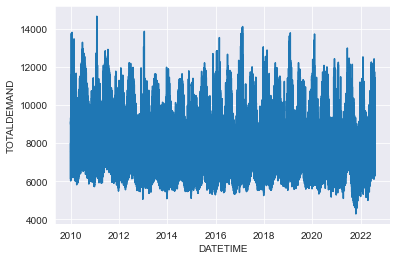

In [20]:
sns.lineplot(data=demand_df, x='DATETIME', y='TOTALDEMAND')

<AxesSubplot:xlabel='DATETIME', ylabel='TOTALDEMAND'>

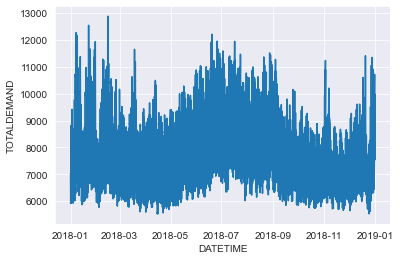

In [23]:
# Look at 2018 data
mask = (demand_df.DATETIME >= pd.Timestamp('2018')) & (demand_df.DATETIME < pd.Timestamp('2019'))
sns.lineplot(data=demand_df.loc[mask], x='DATETIME', y='TOTALDEMAND')

<AxesSubplot:xlabel='DATETIME'>

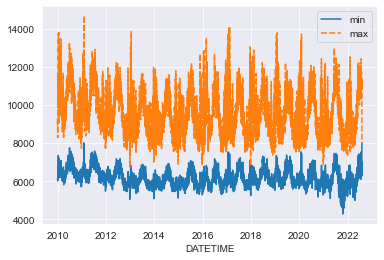

In [28]:
dem_minmax = demand_df.resample('D', on='DATETIME')['TOTALDEMAND'].agg(['min', 'max'])
sns.lineplot(data=dem_minmax)

## Looking at Small-Scale Solar Dataset
Data from Clean Energy Regulator

In [103]:
solar09_df = pd.read_excel('../data/raw/Postcode data for small-scale installations 2009 - all data.xlsx',
                           sheet_name='SGU-Solar', header=2)

C:\Users\sambo\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [104]:
solar09_df.head()

,Small Unit Installation Postcode,Previous Years (2001-2007) - Installations Quantity,Previous Years (2001-2007) - SGU Rated Output In kW,Jan 2008 - Installations Quantity,Jan 2008 - SGU Rated Output In kW,Feb 2008 - Installations Quantity,Feb 2008 - SGU Rated Output In kW,Mar 2008 - Installations Quantity,Mar 2008 - SGU Rated Output In kW,Apr 2008 - Installations Quantity,...,Sep 2009 - Installations Quantity,Sep 2009 - SGU Rated Output In kW,Oct 2009 - Installations Quantity,Oct 2009 - SGU Rated Output In kW,Nov 2009 - Installations Quantity,Nov 2009 - SGU Rated Output In kW,Dec 2009 - Installations Quantity,Dec 2009 - SGU Rated Output In kW,Installations Quantity Total,SGU Rated Output In kW Total
0,0,4,4.46,0,0.00,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,4,4.46
1,200,1,0.08,0,0.00,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,1,0.08
2,800,3,19.36,2,4.16,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,7,34.74
3,801,2,3.44,0,0.00,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,2,3.44
4,803,0,0.00,0,0.00,0,0.0,0,0.0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.00


In [105]:
def nsw_mask(df):
    mask = (df['Small Unit Installation Postcode'] >= 2000) & (df['Small Unit Installation Postcode'] < 3000)
    return mask


In [106]:
mask09 = nsw_mask(solar09_df)
nsw09_df = solar09_df.loc[mask09]

In [107]:
INITIAL_SOLARUNITS = nsw09_df.sum()['Previous Years (2001-2007) - Installations Quantity']
INITIAL_SOLARPOWER = nsw09_df.sum()['Previous Years (2001-2007) - SGU Rated Output In kW']


In [108]:
# Get total number of units added in usable format
solar_units = nsw09_df.filter(regex='2009 - Installations Quantity', axis=1).sum()
solar_units.index = ['Jan 2009', 'Feb 2009', 'Mar 2009', 'Apr 2009', 'May 2009', 'Jun 2009',
                 'Jul 2009', 'Aug 2009', 'Sep 2009', 'Oct 2009', 'Nov 2009', 'Dec 2009']
solar_units.index = pd.to_datetime(solar_units.index)

# Do the same for power added
solar_output = nsw09_df.filter(regex='2009 - SGU Rated Output In kW', axis=1).sum()
solar_output.index = ['Jan 2009', 'Feb 2009', 'Mar 2009', 'Apr 2009', 'May 2009', 'Jun 2009',
                      'Jul 2009', 'Aug 2009', 'Sep 2009', 'Oct 2009', 'Nov 2009', 'Dec 2009']
solar_output.index = pd.to_datetime(solar_output.index)

In [109]:
# Add data from other workbooks
months = ['Jan ', 'Feb ', 'Mar ', 'Apr ', 'May ', 'Jun ',
          'Jul ', 'Aug ', 'Sep ', 'Oct ', 'Nov ', 'Dec ']


for year in range(2010, 2021):
    df = pd.read_excel('../data/raw/Postcode data for small-scale installations ' + str(year) + ' - all data.xlsx',
                    sheet_name=0, header=2)
    # filter by NSW data only
    loc_mask = nsw_mask(df)
    df = df.loc[loc_mask]
    # separate Quantity and Output
    df_units = df.filter(regex= str(year) + ' - Installations Quantity', axis=1).sum()
    df_output = df.filter(regex= str(year) + ' - SGU Rated Output In kW', axis=1).sum()
    # Reset index to datetime
    month_year = []
    for month in months:
        month_year.append(month + str(year))
    df_units.index = month_year
    df_units.index = pd.to_datetime(df_units.index)
    df_output.index = month_year
    df_output.index = pd.to_datetime(df_output.index)
    # Append to end of dataframe
    solar_units = pd.concat([solar_units, df_units])
    solar_output = pd.concat([solar_output, df_output])


C:\Users\sambo\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\sambo\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\sambo\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\sambo\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\sambo\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be igno

<AxesSubplot:>

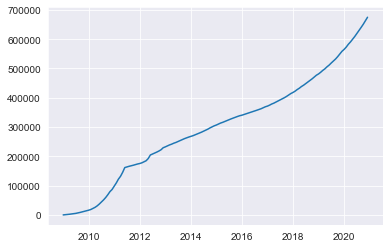

In [117]:
sns.lineplot(data=solar_units.cumsum())

<AxesSubplot:>

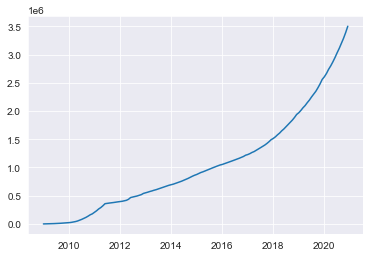

In [119]:
sns.lineplot(data=solar_output.cumsum())

In [125]:
# Build usable dataset for export
cum_solar_units = solar_units.cumsum() + INITIAL_SOLARUNITS
cum_solar_output = solar_output.cumsum() + INITIAL_SOLARPOWER

solar_df = pd.concat([solar_units, cum_solar_units, solar_output, cum_solar_output], axis=1)
solar_df.rename(columns={0:'solar units added', 1:'cumulative units added', 2:'solar output added', 3:'cumulative output added'}, inplace=True)

In [126]:
solar_df

,solar units added,cumulative units added,solar output added,cumulative output added
2009-01-01,471,2226.0,626.522,3049.321
2009-02-01,661,2887.0,871.453,3920.774
2009-03-01,791,3678.0,1113.565,5034.339
2009-04-01,828,4506.0,1212.777,6247.116
2009-05-01,931,5437.0,1228.690,7475.806
...,...,...,...,...
2020-08-01,10063,630827.0,80245.865,3112498.205
2020-09-01,11059,641886.0,90265.829,3202764.034
2020-10-01,10578,652464.0,87108.487,3289872.521
2020-11-01,12191,664655.0,102589.506,3392462.027


In [127]:
solar_df.to_csv('../data/raw/nsw_residential_solar.csv')